# Fields Academy | Western University
### Neural Networks, Assignment 3
### Evan Callaghan
### April 21, 2023

### Problem 2. b)

In [103]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

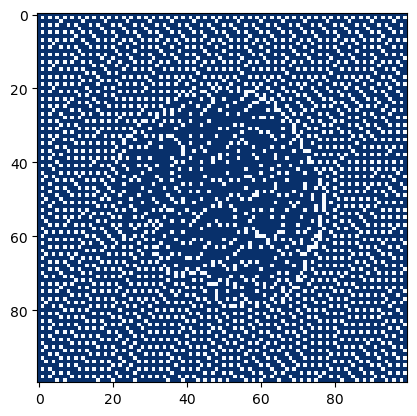

In [185]:
## i. Loading the image and turning it into a numpy array with +/-1 entries
img = Image.open('memory1-1.png')

## Setting some helpful parameters
image_width = 100
image_height = 100

## Resizing the image to be 100x100
img = img.resize((image_width, image_height))

## Binarizing the image
img = img.convert('1')

## Converting image to a numpy array
memory = np.array(img)

## Displaying the image
plt.imshow(memory, cmap = 'Blues')
plt.show()

In [163]:
# Train the network
W = np.zeros((N, pattern_width * pattern_height))

for i in range(pattern_width * pattern_height):
    for j in range(pattern_width * pattern_height):
        if i == j or W[i, j] != 0.0:
            continue
            
        w = 0.0
        
        for n in range(nb_patterns):
            w += patterns[n, i] * patterns[n, j]
            
        W[i, j] = w / patterns.shape[0]  
        W[j, i] = W[i, j]  

(10000,)

In [186]:
## ii.  Flattening this array into a 1 × 100^2 array
v = memory.flatten()

## iii. Using the provided definition to find the weight matrix 

## Setting the number of neurons
N = 10000

## Initializing the weight matrix
weight_matrix = np.zeros((N, N))

for i in range(N):
    for j in range(N):
        if (i == j or weight_matrix[i,j] != 0.0):
            continue
        weight_matrix[i,j] = v[i] * v[j] / N
        weight_matrix[j,i] = weight_matrix[i,j]

In [187]:
weight_matrix.shape

(10000, 10000)

In [126]:
## iv. Performing a state update and computing the energy function at each step

## Creating initial array
v_array = np.random.randint(0, 2, size = N)

## Changing from 0/1 to -1/1
v_array = np.where(v_array == 0, -1, 1)

images = []
energies = []

for i in range(10):
    
    for neuron in range(N):
        
        random_idx = np.random.randint(0, N)
        index_activation = np.dot(weight_matrix[random_idx,:], v_array) 
        
        if index_activation < 0: 
            v_array[random_idx] = -1
        else:
            v_array[random_idx] = 1
    
    images.append(v_array)
    ## Computing energy function
    energy = -0.5 * np.dot(np.dot(v_array.T, weight_matrix), v_array)
    energies.append(energy)
    print(energy)

-1175.2617999999134
-2140.164199999822
-2567.916199999786
-2766.5577999997613
-2827.893799999746
-2853.522999999742
-2858.057799999755
-2861.0829999997363
-2861.0829999997363
-2861.0829999997363


In [134]:
v_array

array([1, 1, 1, ..., 1, 1, 1])

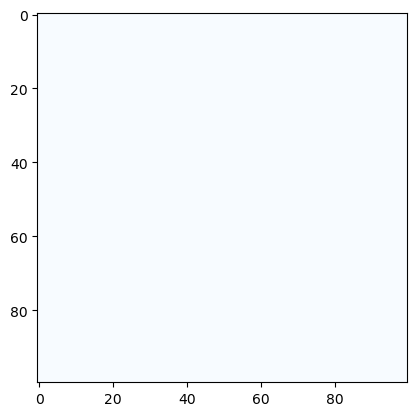

In [132]:
plt.imshow(images[9].reshape((100, 100)), cmap = 'Blues')
plt.show()

In [137]:
X = fetch_MNIST("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1,784))
    
#convert to binary
X_binary = np.where(X>20, 1,-1)

#Snag a memory from computer brain
memories_list = np.array([X_binary[np.random.randint(len(X))]])

In [140]:
memory = np.array(memories_list)

In [141]:
memory.size

784

In [142]:
memory.shape[1] 

784

In [143]:
state = np.random.randint(-2,2,(N,1)) #state vector
weights = np.zeros((N, N)) #weights vector
energies = [] 

In [147]:
weights = (1 / memory.shape[0]) * np.dot(memory.T, memory) #hebbian learning
np.fill_diagonal(weights, 0)

In [148]:
weights

array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [66]:
test = np.sign(np.matmul(weight_matrix, v))

In [67]:
test.shape

(10000,)

In [68]:
test

array([1., 1., 1., ..., 1., 0., 1.])

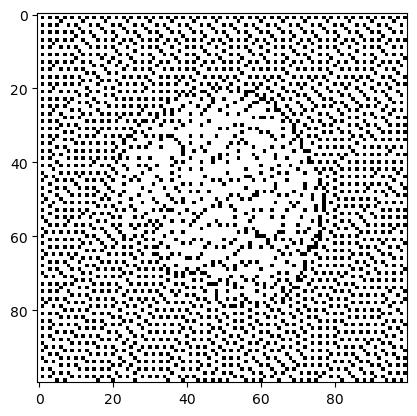

In [53]:
## Converting image to a numpy array
img_array = np.array(img)
    
## Turn into memory pattern: Flattening the array to a 1 x 100^2 array
flattened_image = img_array.flatten()

plt.imshow(img_array, cmap = 'gray')
plt.show()

None
(100, 100)
L


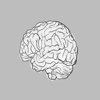

In [18]:
print(img.format)
print(img.size)
print(img.mode)
img.show()

In [ ]:
img_array

In [ ]:
# Open the image using Pillow
    img = Image.open(image_path)
    
    # Convert the image to grayscale
    img = img.convert('L')
    
    # Resize the image to 100x100 pixels
    img = img.resize((100, 100))
    
    # Convert the image to a numpy array
    img_array = np.array(img)
    
    # Normalize the pixel values to be between -1 and 1
    img_array = img_array / 127.5 - 1.0
    
    # Flatten the array to a 1 x 100^2 array
    flattened_array = img_array.flatten()
    
    return flattened_array

In [ ]:
img.shape

In [172]:
nb_patterns = 4   # Number of patterns to learn
pattern_width = 5
pattern_height = 5
max_iterations = 10

# Define Patterns
patterns = np.array([
   [1,-1,-1,-1,1,1,-1,1,1,-1,1,-1,1,1,-1,1,-1,1,1,-1,1,-1,-1,-1,1.],   # Letter D
   [-1,-1,-1,-1,-1,1,1,1,-1,1,1,1,1,-1,1,-1,1,1,-1,1,-1,-1,-1,1,1.],    # Letter J
   [1,-1,-1,-1,-1,-1,1,1,1,1,-1,1,1,1,1,-1,1,1,1,1,1,-1,-1,-1,-1.],     # Letter C
   [-1,1,1,1,-1,-1,-1,1,-1,-1,-1,1,-1,1,-1,-1,1,1,1,-1,-1,1,1,1,-1.],], # Letter M 
   dtype=np.float)

/tmp/ipykernel_7046/3015459597.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.float)


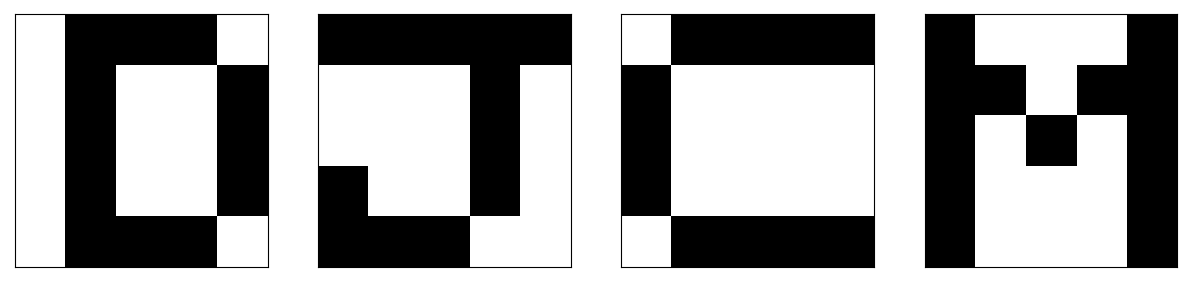

In [173]:
# Show the patterns
fig, ax = plt.subplots(1, nb_patterns, figsize=(15, 10))

for i in range(nb_patterns):
    ax[i].matshow(patterns[i].reshape((pattern_height, pattern_width)), cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

In [174]:
# Train the network
W = np.zeros((pattern_width * pattern_height, pattern_width * pattern_height))

for i in range(pattern_width * pattern_height):
    for j in range(pattern_width * pattern_height):
        if i == j or W[i, j] != 0.0:
            continue
            
        w = 0.0
        
        for n in range(nb_patterns):
            w += patterns[n, i] * patterns[n, j]
            
        W[i, j] = w / patterns.shape[0]  
        W[j, i] = W[i, j]  

/tmp/ipykernel_7046/147968534.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.float)


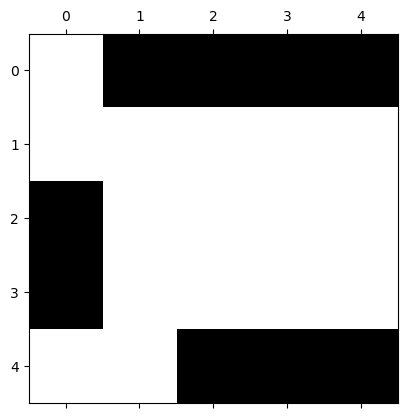

In [176]:
# Test the Network
# Create a corrupted pattern S
S = np.array(    [1,-1,-1,-1,-1,1,1,1,1,1,-1,1,1,1,1,-1,1,1,1,1,1,1,-1,-1,-1.],     
   dtype=np.float)
   
# Show the corrupted pattern
fig, ax = plt.subplots()
ax.matshow(S.reshape((pattern_height, pattern_width)), cmap='gray')

array([[13., 11.,  4., 12.],
       [13., 11.,  2., 12.],
       [12., 10.,  1., 13.],
       [12., 10.,  1., 13.],
       [11.,  9.,  0., 14.],
       [11.,  9.,  0., 14.],
       [11.,  9.,  0., 14.],
       [11.,  9.,  0., 14.],
       [11.,  9.,  0., 14.],
       [11.,  9.,  0., 14.]])

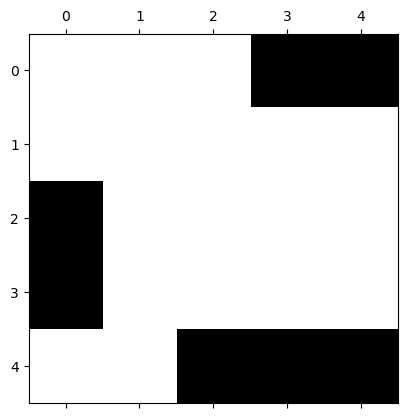

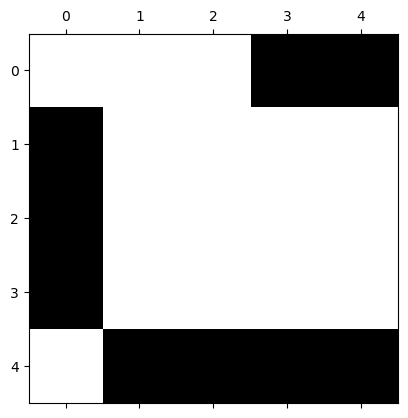

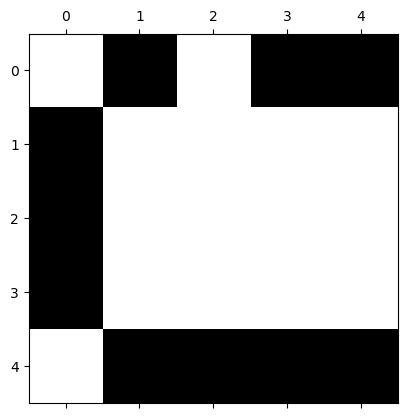

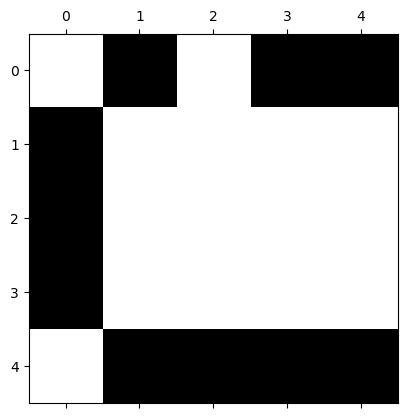

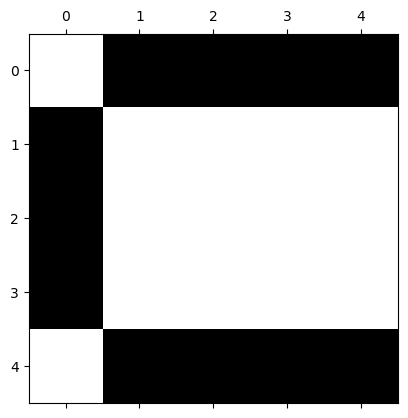

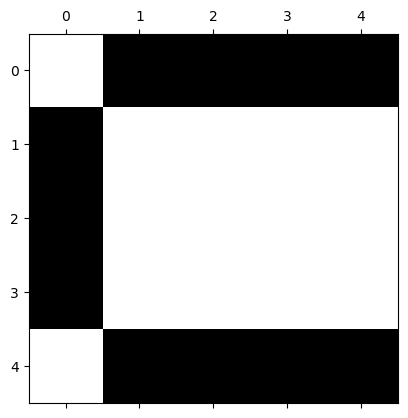

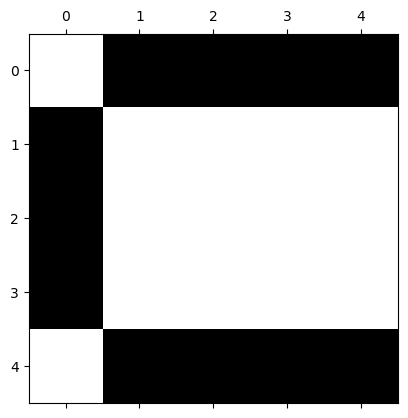

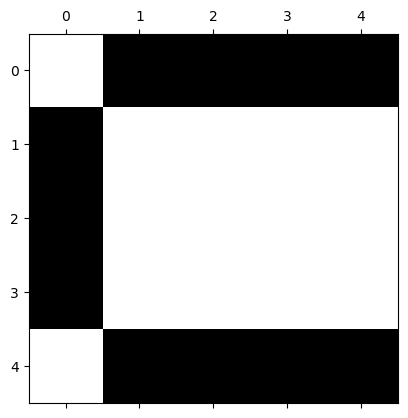

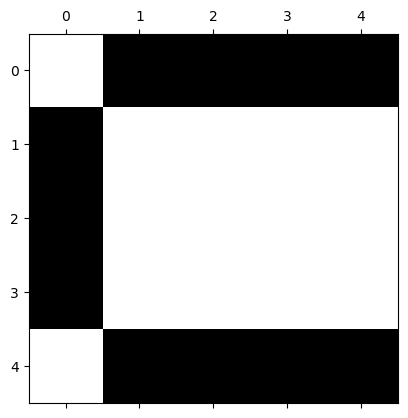

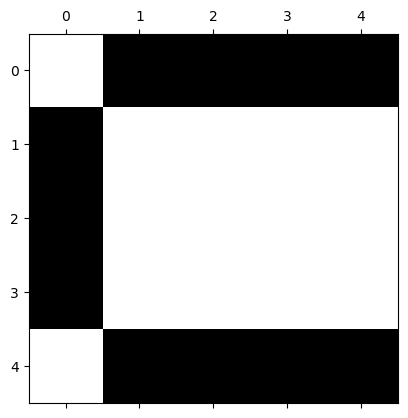

In [177]:
h = np.zeros((pattern_width * pattern_height))
#Defining Hamming Distance matrix for seeing convergence 
hamming_distance = np.zeros((max_iterations,nb_patterns))
for iteration in range(max_iterations):
    for i in range(pattern_width * pattern_height):
        i = np.random.randint(pattern_width * pattern_height)
        h[i] = 0
        for j in range(pattern_width * pattern_height):
            h[i] += W[i, j]*S[j]
        S = np.where(h<0, -1, 1)
    for i in range(nb_patterns):
        hamming_distance[iteration, i] = ((patterns - S)[i]!=0).sum()   
    
    fig, ax = plt.subplots()
    ax.matshow(S.reshape((pattern_height, pattern_width)), cmap='gray')
hamming_distance